In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob
import os

from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tweets_df = pd.read_csv(r'/content/drive/MyDrive/dataset_sma/google (2).csv')

In [ ]:
tweets_df.head(5)

,Link,Username,Rank,Timeline,Review,Response,Rating
0,https://lh3.googleusercontent.com/a-/ALV-UjWHb...,Saurabh Kanade,Local Guide · 37 reviews · 20 photos,6 months ago,Amezing ClassRooms.\nAir Conditioner & Fan Bot...,Like,4
1,https://lh3.googleusercontent.com/a/ACg8ocKaRp...,Rasika Pujare,Local Guide · 18 reviews · 170 photos,2 years ago,I visited the institute as it was my examinati...,NaN,1
2,https://lh3.googleusercontent.com/a-/ALV-UjV4l...,V S,Local Guide · 22 reviews · 7 photos,2 months ago,This was my CAT exam center. Though exam didn'...,Share,5
3,https://lh3.googleusercontent.com/a-/ALV-UjUV4...,Sneha Yadav,Local Guide · 7 reviews · 61 photos,4 years ago,"It's the best college in Thane, growing rapidl...",NaN,3
4,https://lh3.googleusercontent.com/a-/ALV-UjWll...,AJP Travel,"Local Guide · 112 reviews · 3,469 photos",2 years ago,It is beside highway so keep check on take in ...,NaN,5


In [ ]:
tweets_df.to_csv()

',Link,Username,Rank,Timeline,Review,Response,Rating\n0,https://lh3.googleusercontent.com/a-/ALV-UjWHbbHyID9JAf9BHT7KFu3de-6BWe5hYGy8KCYw-eadFX8=w45-h45-p-rp-mo-ba3-br100,Saurabh Kanade,Local Guide · 37 reviews · 20 photos,6 months ago,"Amezing ClassRooms.\nAir Conditioner & Fan Both are Available In Each Class.\n5 Floors Building. …",Like,4\n1,https://lh3.googleusercontent.com/a/ACg8ocKaRpBWNmcAV2379Q7sRK5dn039G9qSigl2QfDCg6Zw=w45-h45-p-rp-mo-ba4-br100,Rasika Pujare,Local Guide · 18 reviews · 170 photos,2 years ago,"I visited the institute as it was my examination center for the online exam. It is accessible from Thane Railway Station either by TMT BUS, Private BUS or by an auto rickshaw. The place is big as it is an engineering college but from …",,1\n2,https://lh3.googleusercontent.com/a-/ALV-UjV4l0yDdua3Sgmene5dJ4SiGYfL-m7OpcayJbiztQVWZM_A=w45-h45-p-rp-mo-ba4-br100,V S,Local Guide · 22 reviews · 7 photos,2 months ago,"This was my CAT exam center. Though exam didn\'t go very well, c

In [ ]:
tweets_df.shape

(190, 7)

In [ ]:
tweets_df.head

<bound method NDFrame.head of                                                   Link              Username  \
0    https://lh3.googleusercontent.com/a-/ALV-UjWHb...        Saurabh Kanade   
1    https://lh3.googleusercontent.com/a/ACg8ocKaRp...         Rasika Pujare   
2    https://lh3.googleusercontent.com/a-/ALV-UjV4l...                   V S   
3    https://lh3.googleusercontent.com/a-/ALV-UjUV4...           Sneha Yadav   
4    https://lh3.googleusercontent.com/a-/ALV-UjWll...            AJP Travel   
..                                                 ...                   ...   
185  https://lh3.googleusercontent.com/a-/ALV-UjWku...           Sumedh Shah   
186  https://lh3.googleusercontent.com/a-/ALV-UjXaJ...         Sarvesh Pawar   
187  https://lh3.googleusercontent.com/a-/ALV-UjWSk...  MANOJ M. MANIKSHETTI   
188  https://lh3.googleusercontent.com/a-/ALV-UjVX6...       Mayuresh Vartak   
189  https://lh3.googleusercontent.com/a/ACg8ocKn2F...            Megha Soni   

                                         Rank      Timeline  \
0        Local Guide · 37 reviews · 20 photos  6 months ago   
1       Local Guide · 18 reviews · 170 photos   2 years ago   
2         Local Guide · 22 reviews · 7 photos  2 months ago   
3         Local Guide · 7 reviews · 61 photos   4 years ago   
4    Local Guide · 112 reviews · 3,469 photos   2 years ago   
..                                        ...           ...   
185     Local Guide · 82 reviews · 838 photos   5 years ago   
186                                 2 reviews   4 years ago   
187                      4 reviews · 4 photos   3 years ago   
188      Local Guide · 46 reviews · 18 photos   5 years ago   
189       Local Guide · 60 reviews · 3 photos   3 years ago   

                                                Review Response  Rating  
0    Amezing ClassRooms.\nAir Conditioner & Fan Bot...     Like       4  
1    I visited the institute as it was my examinati...      NaN       1  
2    This was my CAT exam center. Though exam didn'...    Share       5  
3    It's the best college in Thane, growing rapidl...      NaN       3  
4    It is beside highway so keep check on take in ...      NaN       5  
..                                                 ...      ...     ...  
185  College with great infrastructure and all the ...    Share       4  
186  Greenery from all side, AC classroom, best ins...    Share       2  
187  Very nice place and it is situated near main r...    Share       5  
188  Nice infrastructure .Bank and food available n...    Share       4  
189  Went to take admission in the college, great s...    Share       4  

[190 rows x 7 columns]>

In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Link      190 non-null    object
 1   Username  190 non-null    object
 2   Rank      190 non-null    object
 3   Timeline  190 non-null    object
 4   Review    190 non-null    object
 5   Response  168 non-null    object
 6   Rating    190 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 10.5+ KB


In [ ]:
tweets_df.value_counts()

Link                                                                                                                 Username              Rank                                  Timeline     Review                                                                                                                                                                                                                                                                                                   Response  Rating
https://lh3.googleusercontent.com/a-/ALV-UjU3008mwP5fF5NL_GdAL506v-UbzT2OWp14StXYcS1AsTig=w45-h45-p-rp-mo-ba3-br100  Mugdha A              Local Guide · 26 reviews · 10 photos  4 years ago  Excellent infrastructure and expert faculties in every domain offer students the opportunity to be industry ready. Hands-on training and recent software courses are being offered to students                                                                                                           Share    

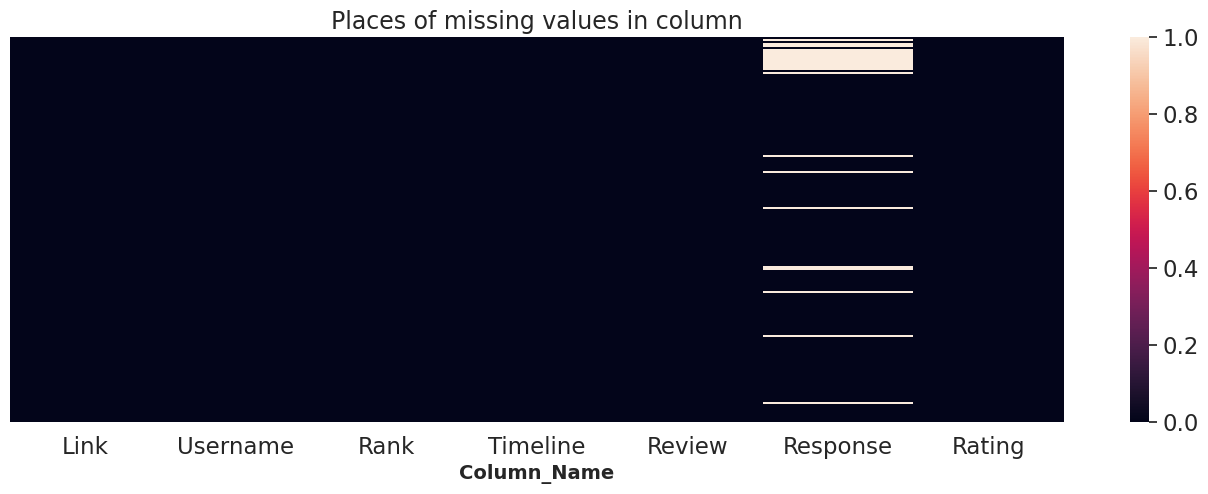

In [ ]:
plt.figure(figsize=(17, 5))
sns.heatmap(tweets_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",size=17)
plt.show()

In [ ]:
import plotly.graph_objects as go
Top_Location_Of_tweet= tweets_df['Username'].value_counts().head (10)

In [ ]:
print(Top_Location_Of_tweet)

Username
Samanwita Bagg      2
Saurabh Kanade      1
Gauri Deshpande     1
sonia aneesh        1
Om Bheda            1
Geetanjali Kalme    1
Rutwik Gaikwad      1
Krishna Gupta       1
Renuka Pawar        1
NiKhiL Sawant       1
Name: count, dtype: int64


In [ ]:
from nltk. corpus import stopwords
stop = stopwords.words('english')
tweets_df['Review'].apply(lambda x: [item for item in x if item not in stop])
tweets_df.shape

(190, 7)

In [ ]:
!pip install tweet-preprocessor

In [ ]:
punct  =  ['%','/',':','\\','&amp','&',';','?']

def remove_punctuations(text):
  for punctuation in punct:
    text = text.replace(punctuation,'')
  return text

In [ ]:
tweets_df['Review'] = tweets_df['Review'].apply(lambda x: remove_punctuations(x))

In [ ]:
tweets_df['Review'].replace( '', np.nan, inplace=True)
tweets_df.dropna(subset=["Review"],inplace=True)
len(tweets_df)

190

In [ ]:
tweets_df = tweets_df.reset_index(drop=True)
tweets_df.head()

,Link,Username,Rank,Timeline,Review,Response,Rating
0,https://lh3.googleusercontent.com/a-/ALV-UjWHb...,Saurabh Kanade,Local Guide · 37 reviews · 20 photos,6 months ago,Amezing ClassRooms.\nAir Conditioner Fan Both...,Like,4
1,https://lh3.googleusercontent.com/a/ACg8ocKaRp...,Rasika Pujare,Local Guide · 18 reviews · 170 photos,2 years ago,I visited the institute as it was my examinati...,NaN,1
2,https://lh3.googleusercontent.com/a-/ALV-UjV4l...,V S,Local Guide · 22 reviews · 7 photos,2 months ago,This was my CAT exam center. Though exam didn'...,Share,5
3,https://lh3.googleusercontent.com/a-/ALV-UjUV4...,Sneha Yadav,Local Guide · 7 reviews · 61 photos,4 years ago,"It's the best college in Thane, growing rapidl...",NaN,3
4,https://lh3.googleusercontent.com/a-/ALV-UjWll...,AJP Travel,"Local Guide · 112 reviews · 3,469 photos",2 years ago,It is beside highway so keep check on take in ...,NaN,5


In [ ]:
from sklearn.feature_extraction. text import TfidfVectorizer, CountVectorizer

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ap', 'apsit'] not in stop_words.

<ipython-input-103-f445acaa6acc>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




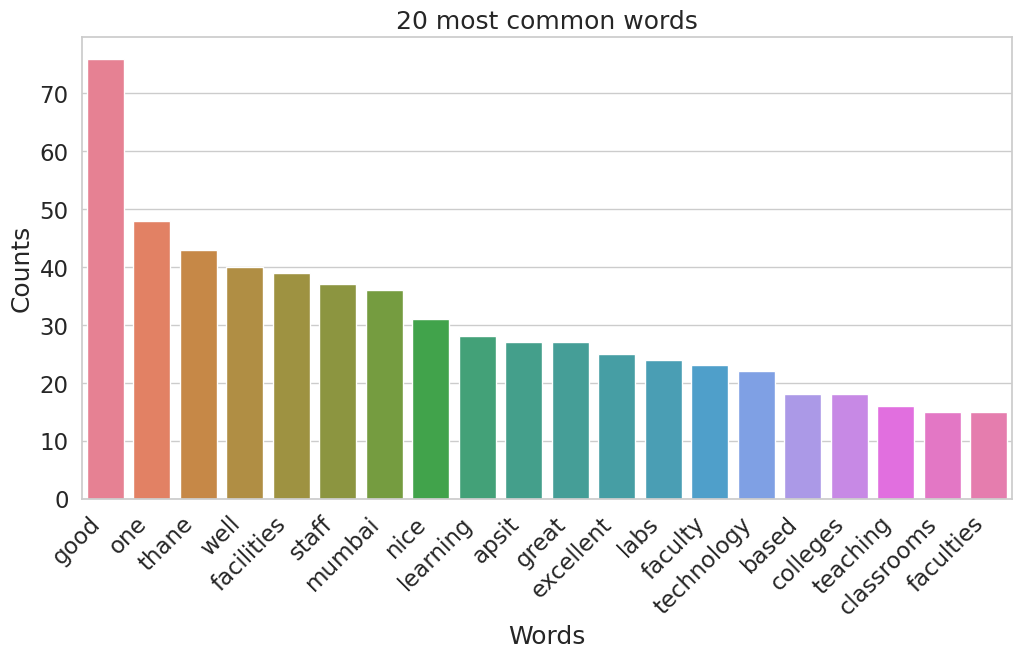

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

sns.set_style('whitegrid')
%matplotlib inline

stop = stop + ['best' , 'college' , 'engineer' , 'engineering', 'AP' ,'shah' ,'institute', 'APSIT', 'AP Shah' , 'AP shah' , 'infrastructure', 'students','shah institute']

def plot_20_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))

    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = dict(zip(words, total_counts))
    count_dict = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:20]

    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]

    x_pos = np.arange(len(words))

    plt.figure(figsize=(12, 6))
    sns.set_context('notebook', font_scale=1.5)
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.title('20 most common words')
    plt.xticks(x_pos, words, rotation=45, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()


count_vectorizer = CountVectorizer(stop_words=stop)
count_data = count_vectorizer.fit_transform(tweets_df['Review'])
plot_20_most_common_words(count_data, count_vectorizer)

<Axes: title={'center': 'Top 8 bigrams'}, ylabel='ngram'>

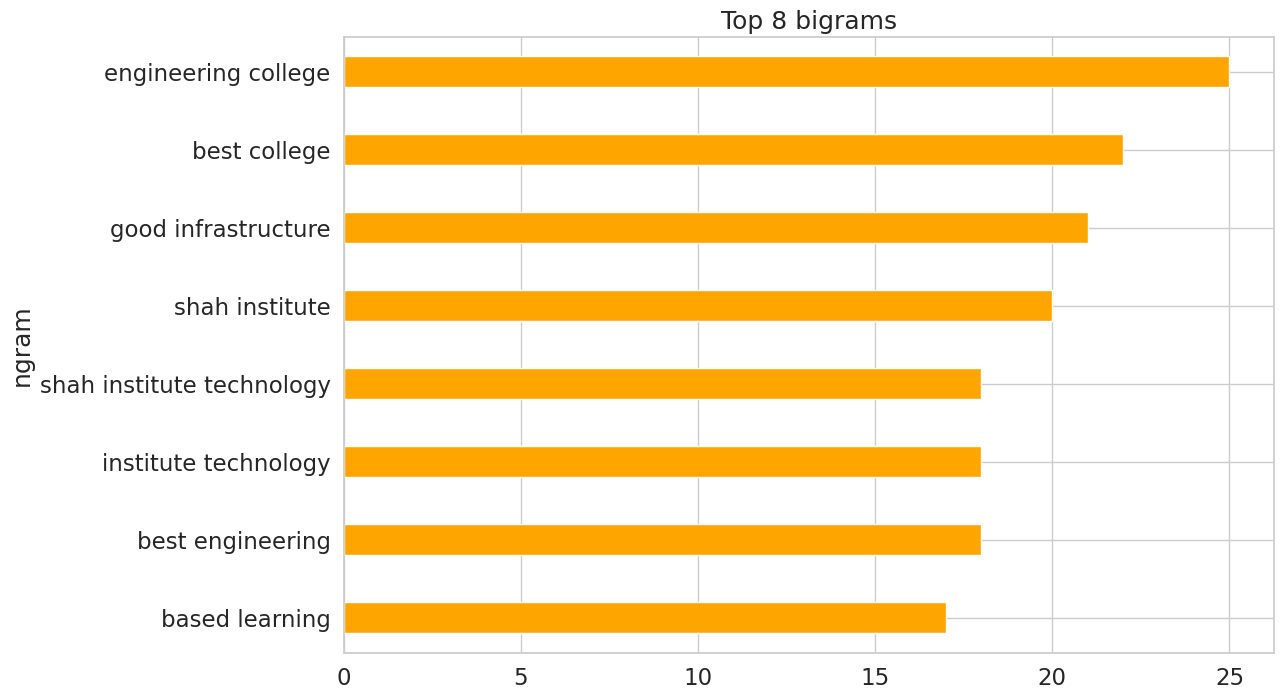

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_bigram(corpus, n=None) :
  vec = CountVectorizer(ngram_range=(2, 4), stop_words="english").fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq =[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words = get_top_n_bigram(tweets_df['Review'] , 8)
mydict={}
for word, freq in common_words:
  bigram_df = pd.DataFrame(common_words,columns = ['ngram', 'count'])

bigram_df.groupby( 'ngram' ).sum()['count'].sort_values(ascending=False).sort_values().plot.barh(title = 'Top 8 bigrams',color='orange' , width=.4, figsize=(12,8),stacked = True)

In [ ]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
tweets_df['subjectivity']=tweets_df[ 'Review'].apply(get_subjectivity)
tweets_df['polarity']=tweets_df[ 'Review'].apply(get_polarity)
tweets_df.loc[:,['Username','Timeline','Response']].head(20)

,Username,Timeline,Response
0,Saurabh Kanade,6 months ago,Like
1,Rasika Pujare,2 years ago,NaN
2,V S,2 months ago,Share
3,Sneha Yadav,4 years ago,NaN
4,AJP Travel,2 years ago,NaN
5,HARSH SHIRKE,4 months ago,Share
6,Akansha Rawat,3 years ago,NaN
7,Rajat Bopalkar,4 years ago,NaN
8,Yash Chavan,4 years ago,NaN
9,anagha aher,4 years ago,NaN


### Polarity Scores ###
Polarity scores are numerical values that range from -1 to 1, where -1 indicates a very negative sentiment, 0 indicates a neutral sentiment, and 1 indicates a very positive sentiment.
Polarity scores can help you quickly identify the overall mood of a text, whether it is a product review, a social media post, or a customer feedback.
Polarity scores may not capture the nuances and context of a text, such as sarcasm, irony, humor, or mixed emotions.
Polarity scores may not reflect the intensity or importance of a sentiment, such as how strongly or weakly a person feels about something

### Subjectivity Score ###
Subjectivity scores are numerical values that range from 0 to 1, where 0 indicates a very objective text, and 1 indicates a very subjective text.
Objective texts are based on facts, evidence, or logic, while subjective texts are based on opinions, feelings, or personal views.
Subjectivity scores can help you filter out irrelevant or biased texts, and focus on the ones that express genuine sentiments.

**5. Sentiment Analysis**

In [ ]:
tweets_df['textblob_score'] =tweets_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
neutral_threshold=0.05

In [ ]:
tweets_df['textblob_sentiment']=tweets_df[ 'textblob_score'].apply(lambda c:'positive' if c >= neutral_threshold else ('Negative' if c <= -(neutral_threshold) else 'Neutral' ) )

In [ ]:
textblob_df =  tweets_df[['Review','textblob_sentiment','Rating']]
textblob_df

,Review,textblob_sentiment,Rating
0,Amezing ClassRooms.\nAir Conditioner Fan Both...,positive,4
1,I visited the institute as it was my examinati...,positive,1
2,This was my CAT exam center. Though exam didn'...,positive,5
3,"It's the best college in Thane, growing rapidl...",positive,3
4,It is beside highway so keep check on take in ...,positive,5
...,...,...,...
185,College with great infrastructure and all the ...,positive,4
186,"Greenery from all side, AC classroom, best ins...",positive,2
187,Very nice place and it is situated near main r...,positive,5
188,Nice infrastructure .Bank and food available n...,positive,4


In [ ]:
textblob_df["textblob_sentiment"].value_counts()

textblob_sentiment
positive    173
Neutral      10
Negative      7
Name: count, dtype: int64

<Axes: title={'center': 'Sentiment Analysis'}, ylabel='textblob_sentiment'>

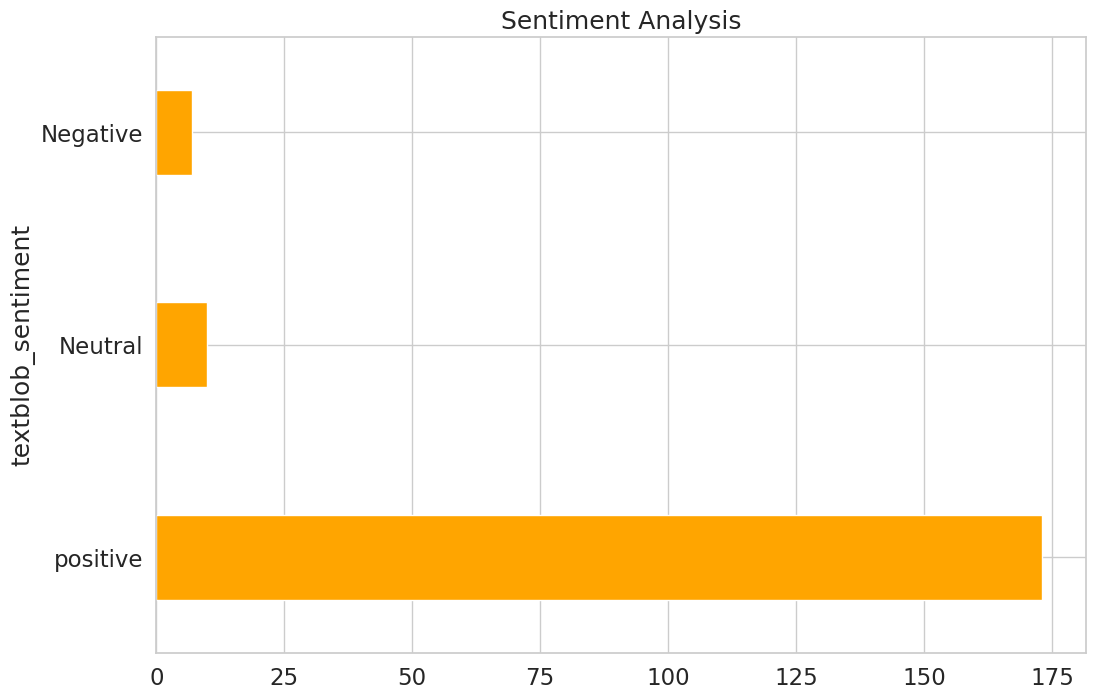

In [ ]:
textblob_df["textblob_sentiment"].value_counts().plot.barh(title = 'Sentiment Analysis',color='orange' , width=.4, figsize=(12,8),stacked = True)

In [ ]:
df_positive=textblob_df[textblob_df['textblob_sentiment']=='positive' ]

In [ ]:
df_very_positive=df_positive[df_positive['Rating']>0]

In [ ]:
df_very_positive.head()

,Review,textblob_sentiment,Rating
0,Amezing ClassRooms.\nAir Conditioner Fan Both...,positive,4
1,I visited the institute as it was my examinati...,positive,1
2,This was my CAT exam center. Though exam didn'...,positive,5
3,"It's the best college in Thane, growing rapidl...",positive,3
4,It is beside highway so keep check on take in ...,positive,5


In [ ]:
df_negative=textblob_df[textblob_df['textblob_sentiment']=='Negative' ]

In [ ]:
df_negative

,Review,textblob_sentiment,Rating
110,Do you aspire to become an Engineer If your an...,Negative,0
137,This is my neet exam center\nI hope they will ...,Negative,1
142,There is no proper management for recruitment ...,Negative,3
143,Impossible for you to reach without google ma....,Negative,5
147,Located on express Highway Thane west...just o...,Negative,4
149,At present on 3 N9v 2019 there is construction...,Negative,2
151,I have go here for pool campus drive... Our re...,Negative,4


In [ ]:
df_neutral=textblob_df[textblob_df['textblob_sentiment']=='Neutral' ]

In [ ]:
df_neutral

,Review,textblob_sentiment,Rating
44,A college that helps its students stand in com...,Neutral,2
83,APSIT has lot of initiatives in the form of co...,Neutral,2
116,A.P.Shah Institute Of Technology is an enginee...,Neutral,2
124,"I have visited this to give exam of railway, e...",Neutral,3
146,College dint conduct convocation ceremony for ...,Neutral,4
163,Take public transport to reach Thane railway s...,Neutral,5
164,I was there for Exam... Its easier to reach he...,Neutral,1
174,2019-20 batch have not yet received their conv...,Neutral,1
179,Hey there I completed my diploma in engineerin...,Neutral,5
184,Sai shradha fabrication and alluminium work,Neutral,1


**Create a Word Cloud**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

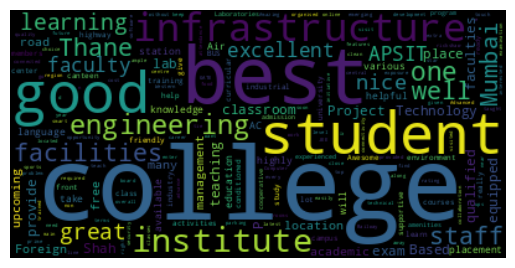

In [ ]:
positive_tw =" ".join(t for t in df_very_positive.Review)
word_cloud1 = WordCloud(collocations = False, background_color = 'black') .generate(positive_tw)
plt. imshow(word_cloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
positive_tw

"Amezing ClassRooms.\nAir Conditioner  Fan Both are Available In Each Class.\n5 Floors Building. … I visited the institute as it was my examination center for the online exam. It is accessible from Thane Railway Station either by TMT BUS, Private BUS or by an auto rickshaw. The place is big as it is an engineering college but from … This was my CAT exam center. Though exam didn't go very well, center was good.\nVery well organised and managed, no disturbance while taking the exam. Although it's close to the highway but still there was no noise inside, rather pin drop … It's the best college in Thane, growing rapidly in academics, co-curricular and extracurricular activities. … It is beside highway so keep check on take in right on time (otherwise need to take far away U-turn)....\nWhile you enter there is nice green plant decorations like garden... … Best college for engineering colleges if in front of biggest mall  minimum percentage required is above 80 percentage,40 min away from Th

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install wordcloud==1.8.0

  Using cached wordcloud-1.8.0.tar.gz (217 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for wordcloud
  Running setup.py clean for wordcloud
Failed to build wordcloud
ERROR: Could not build wheels for wordcloud, which is required to install pyproject.toml-based projects


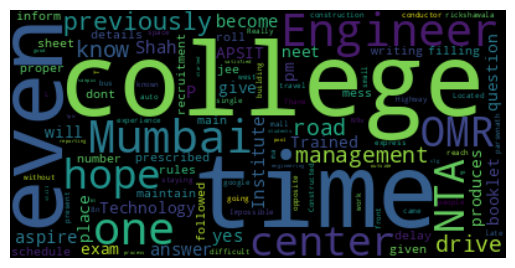

In [ ]:
negative_tw =" ".join(t for t in df_negative.Review)
word_cloud2 = WordCloud(collocations = False, background_color = 'black') .generate(negative_tw)
plt. imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

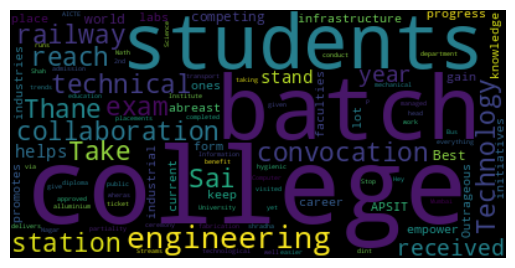

In [ ]:
neutral_tw =" ".join(t for t in df_neutral.Review)
word_cloud2 = WordCloud(collocations = False, background_color = 'black') .generate(neutral_tw)
plt. imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()